In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
homedir  = "."
filepath = "./population"

In [3]:
os.listdir("./population/unixavier_pop16_n128_m3_d4_t3000/")

['pop16_n128_m3_d4_t3000_g75_synapses.npy',
 'pop16_n128_m3_d4_t3000_g01_bias.npy',
 'pop16_n128_m3_d4_t3000_g100_bias.npy',
 'pop16_n128_m3_d4_t3000_g175_synapses.npy',
 'pop16_n128_m3_d4_t3000_g125_bias.npy',
 'pop16_n128_m3_d4_t3000_g150_synapses.npy',
 'pop16_n128_m3_d4_t3000_g200_synapses.npy',
 'pop16_n128_m3_d4_t3000_g50_synapses.npy',
 'pop16_n128_m3_d4_t3000_g01_synapses.npy',
 'pop16_n128_m3_d4_t3000_g75_bias.npy',
 'pop16_n128_m3_d4_t3000_g175_bias.npy',
 'pop16_n128_m3_d4_t3000_g150_bias.npy',
 'pop16_n128_m3_d4_t3000_g25_bias.npy',
 'pop16_n128_m3_d4_t3000_g125_synapses.npy',
 'pop16_n128_m3_d4_t3000_g200_bias.npy',
 'pop16_n128_m3_d4_t3000_g25_synapses.npy',
 'pop16_n128_m3_d4_t3000_g50_bias.npy',
 'pop16_n128_m3_d4_t3000_g100_synapses.npy']

0 1 2 3 4 5 6 7 

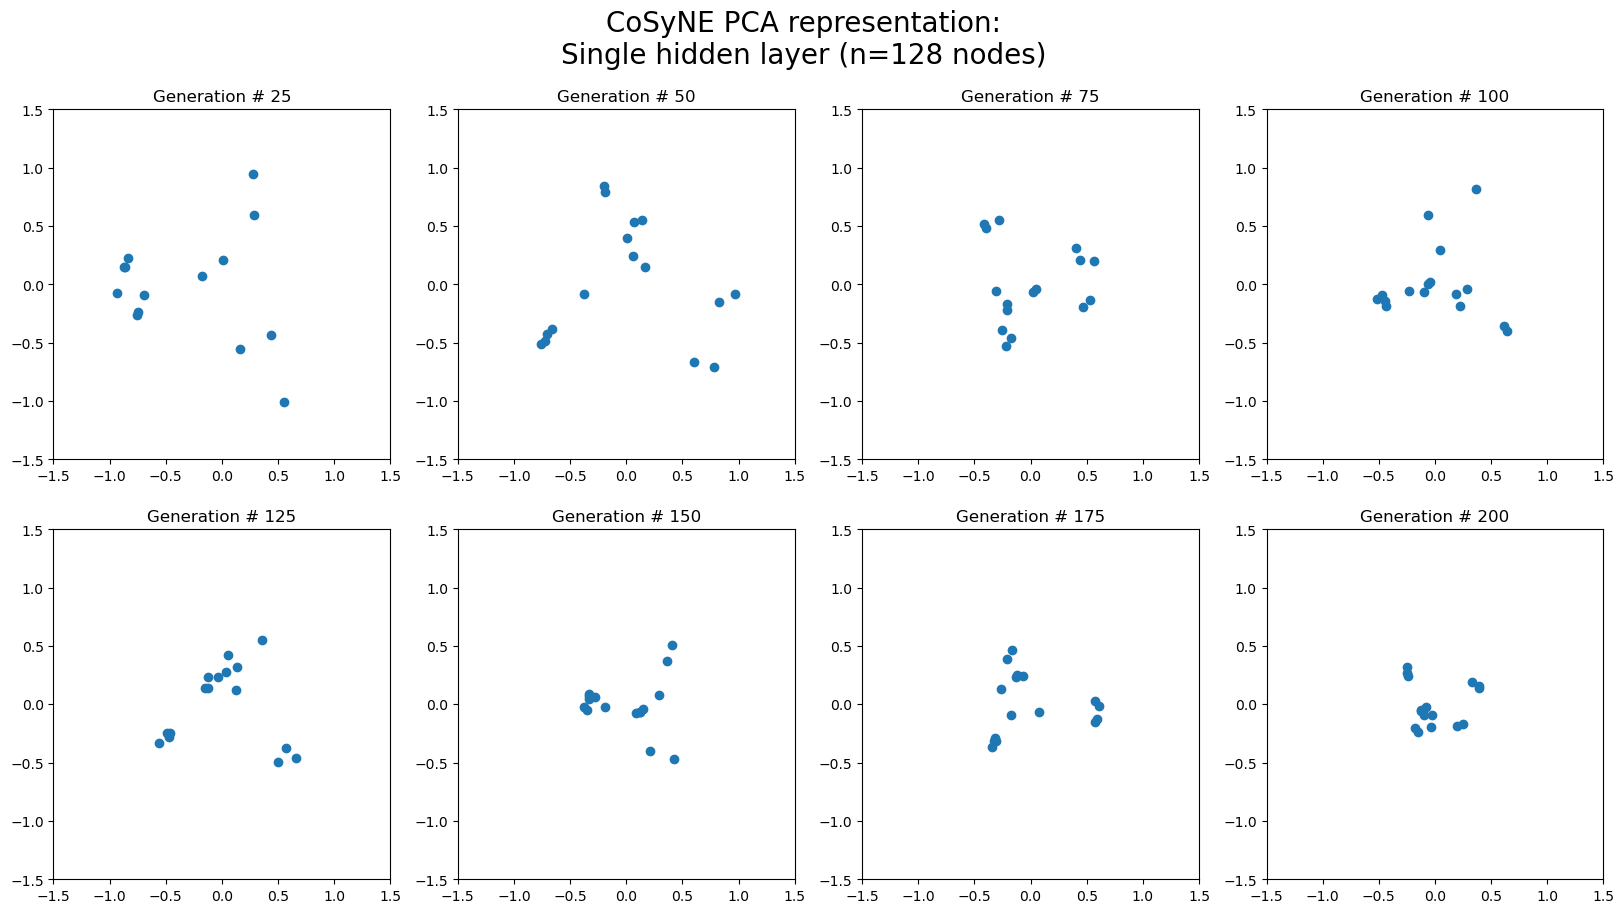

In [4]:
plt.figure(figsize=(20,10))
plt.suptitle("CoSyNE PCA representation:\nSingle hidden layer (n=128 nodes)", fontsize = 20)
specs = ["pop16_n128_m3_d4_t3000"]#, "pop16_n64_64_m3_d4_t3000"]
gens  = [25, 50, 75, 100, 125, 150, 175, 200]
for i,s in enumerate(specs):
    for j,g in enumerate(gens):
        print(j, end=" ")
        tmp = np.load(f"{filepath}/unixavier_{s}/{s}_g{g}_synapses.npy").transpose()
        pca = PCA(n_components=2)
        components = pca.fit_transform(tmp)
        ax = plt.subplot(2, 4, j+1)
        ax.scatter(components[:,0], components[:,1])
        ax.set_title(f"Generation # {g}")
        ax.set_ylim((-1.5,1.5))
        ax.set_xlim((-1.5,1.5))
plt.savefig(f"{homedir}/pca_rep_singlehidden.png")

0 1 2 3 4 5 6 7 8


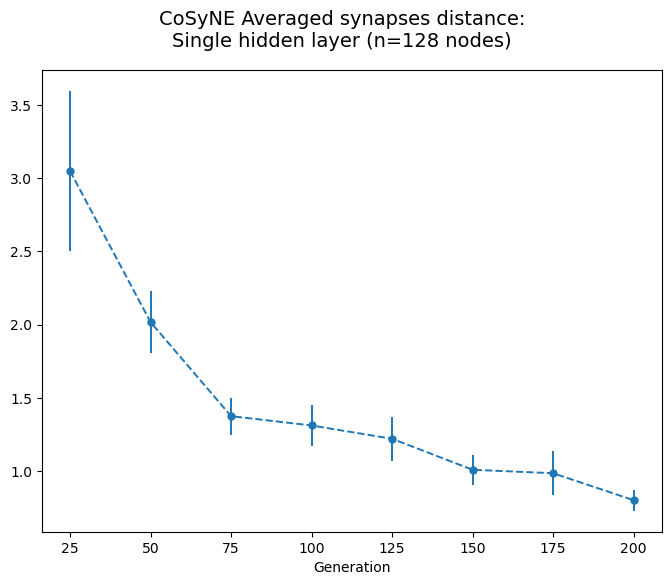

In [5]:
plt.figure(figsize=(8,6))
plt.suptitle("CoSyNE Averaged synapses distance:\nSingle hidden layer (n=128 nodes)", fontsize = 14)
specs = ["pop16_n128_m3_d4_t3000"]#, "pop16_n64_64_m3_d4_t3000"]
gens  = [25, 50, 75, 100, 125, 150, 175, 200]
strc = dict()
strc["mean"],strc["std"]=[],[]
for i,s in enumerate(specs):
    for j,g in enumerate(gens):
        print(j, end=" ")
        curr_syn = np.load(f"{filepath}/unixavier_{s}/{s}_g{g}_synapses.npy").transpose()   
        all_ = []
        for i in range(curr_syn.shape[0]):
            tmp = np.linalg.norm(curr_syn[i,:]-curr_syn, axis =1)
            all_.append(tmp[tmp!=0])
        strc["mean"].append(np.array(all_).mean())
        strc["std"].append(np.array(all_).std())

print(len(strc["mean"]))
plt.errorbar(range(0, len(strc["mean"])), strc["mean"], yerr=strc["std"],  marker='o', linestyle='dashed', linewidth=1.4, markersize=5)
plt.xticks(ticks = range(0,8), labels=[str(n) for n in [25, 50, 75, 100, 125, 150, 175, 200]])
plt.xlabel("Generation")
plt.savefig(f"{homedir}/avg_syn_distance_singlehidden.png")

0 1 2 3 4 5 6 7 

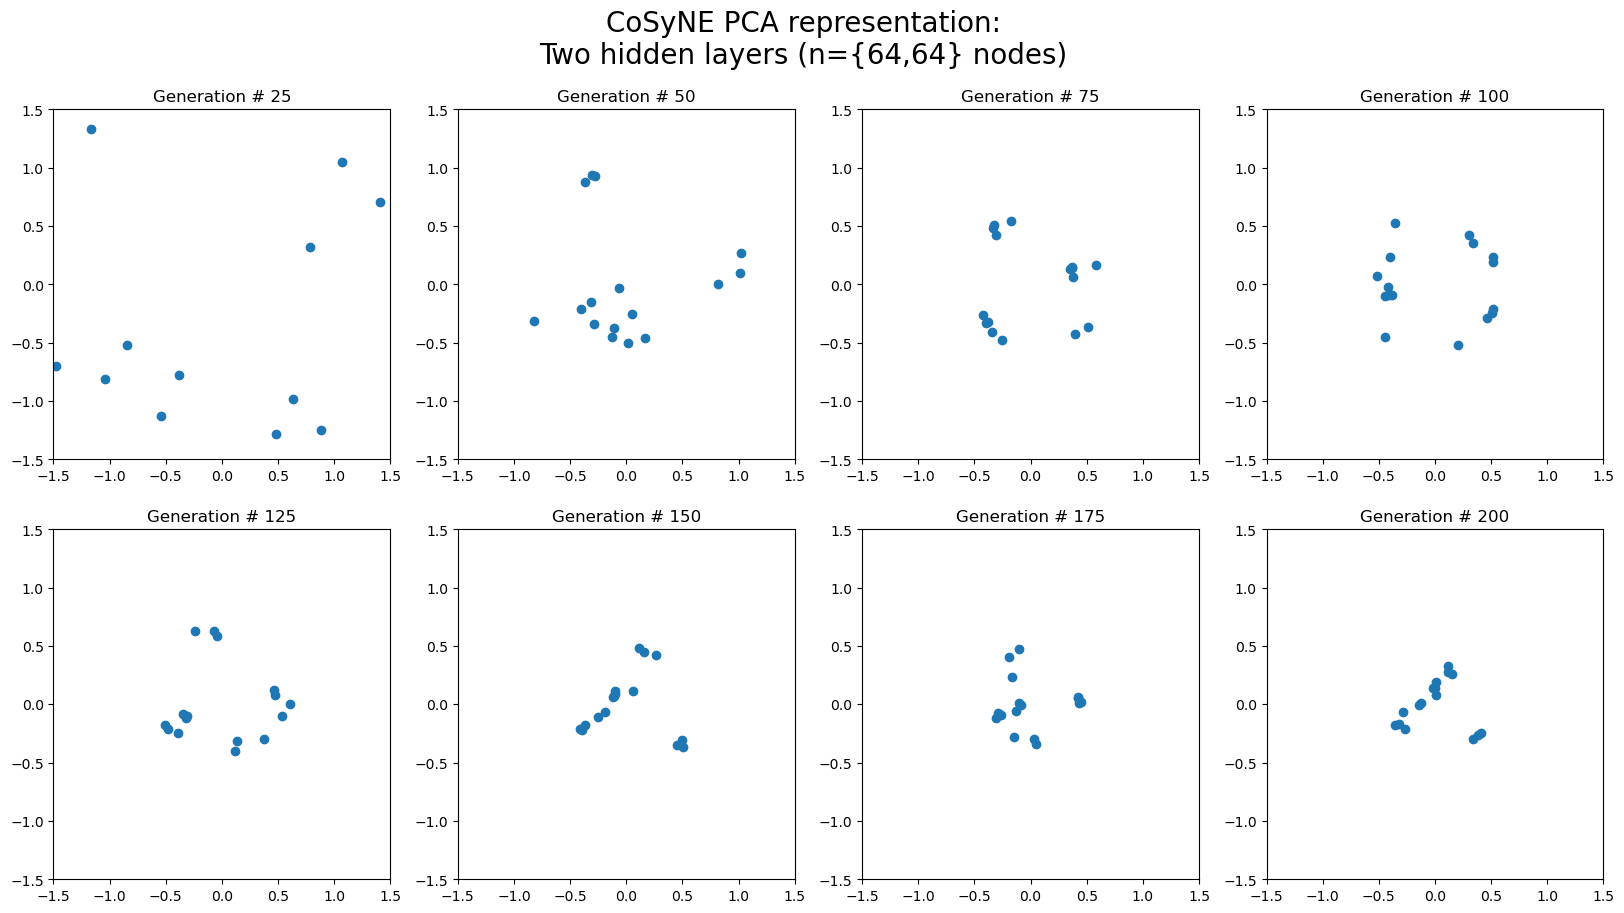

In [6]:
plt.figure(figsize=(20,10))
plt.suptitle("CoSyNE PCA representation:\nTwo hidden layers (n={64,64} nodes)", fontsize = 20)
specs = ["pop16_n64_64_m3_d4_t3000"]#, "pop16_n64_64_m3_d4_t3000"]
gens  = [25, 50, 75, 100, 125, 150, 175, 200]
for i,s in enumerate(specs):
    for j,g in enumerate(gens):
        print(j, end=" ")
        tmp = np.load(f"{filepath}/unixavier_{s}/{s}_g{g}_synapses.npy").transpose()
        pca = PCA(n_components=2)
        components = pca.fit_transform(tmp)
        ax = plt.subplot(2, 4, j+1)
        ax.scatter(components[:,0], components[:,1])
        ax.set_title(f"Generation # {g}")
        ax.set_ylim((-1.5,1.5))
        ax.set_xlim((-1.5,1.5))
plt.savefig(f"{homedir}/pca_rep_multihidden.png")

0 1 2 3 4 5 6 7 8


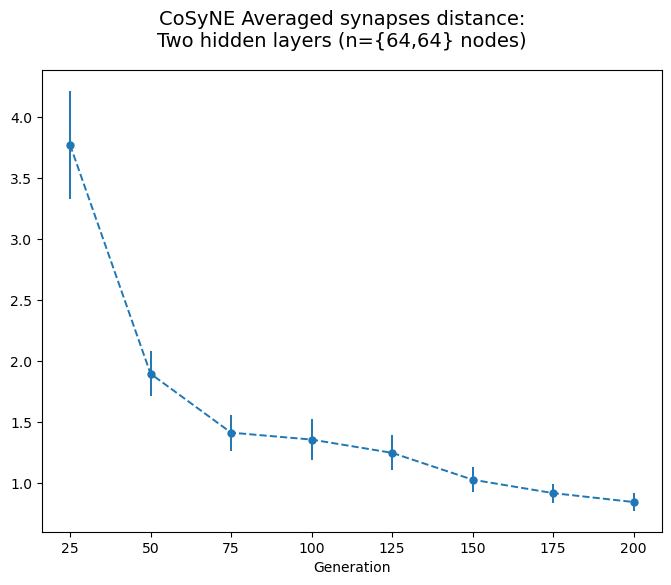

In [7]:
plt.figure(figsize=(8,6))
plt.suptitle("CoSyNE Averaged synapses distance:\nTwo hidden layers (n={64,64} nodes)", fontsize = 14)
specs = ["pop16_n64_64_m3_d4_t3000"]
gens  = [25, 50, 75, 100, 125, 150, 175, 200]
strc = dict()
strc["mean"],strc["std"]=[],[]
for i,s in enumerate(specs):
    for j,g in enumerate(gens):
        print(j, end=" ")
        curr_syn = np.load(f"{filepath}/unixavier_{s}/{s}_g{g}_synapses.npy").transpose()      
        all_ = []
        for i in range(curr_syn.shape[0]):
            tmp = np.linalg.norm(curr_syn[i,:]-curr_syn, axis =1)
            all_.append(tmp[tmp!=0])
        strc["mean"].append(np.array(all_).mean())
        strc["std"].append(np.array(all_).std())

print(len(strc["mean"]))
plt.errorbar(range(0, len(strc["mean"])), strc["mean"], yerr=strc["std"],  marker='o', linestyle='dashed', linewidth=1.4, markersize=5)
plt.xticks(ticks = range(0,8), labels=[str(n) for n in [25, 50, 75, 100, 125, 150, 175, 200]])
plt.xlabel("Generation")

plt.savefig(f"{homedir}/avg_syn_distance_twohidden.png")

pop16_n128_m3_d4_t3000
0 1 2 3 4 5 6 7 pop16_n64_64_m3_d4_t3000
0 1 2 3 4 5 6 7 

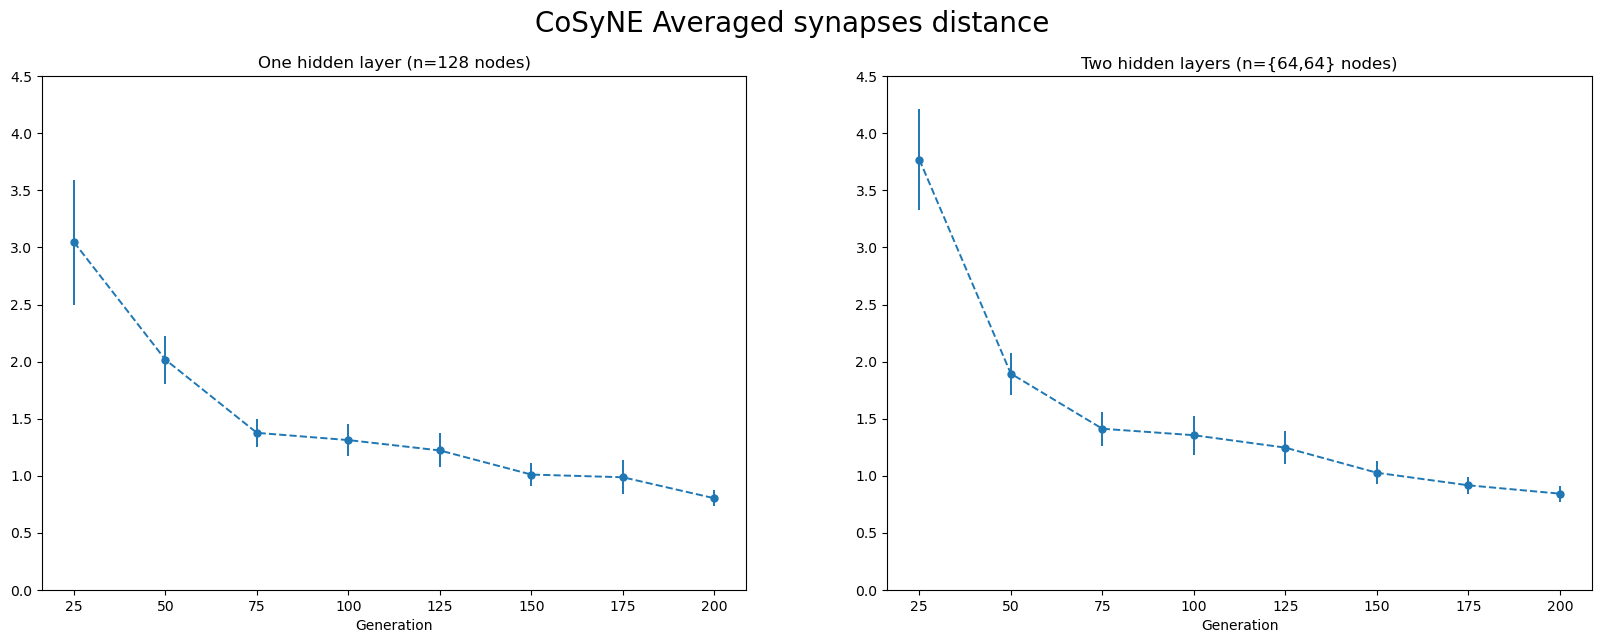

In [8]:
plt.figure(figsize=(20,20/3))
plt.suptitle("CoSyNE Averaged synapses distance", fontsize = 20)
specs = ["pop16_n128_m3_d4_t3000", "pop16_n64_64_m3_d4_t3000"]
gens  = [25, 50, 75, 100, 125, 150, 175, 200]

for ii,s in enumerate(specs):
    print(s)
    strc = dict()
    strc["mean"],strc["std"]=[],[]
    for j,g in enumerate(gens):
        print(j, end=" ")
        curr_syn = np.load(f"{filepath}/unixavier_{s}/{s}_g{g}_synapses.npy").transpose()      
        all_ = []
        for i in range(curr_syn.shape[0]):
            tmp = np.linalg.norm(curr_syn[i,:]-curr_syn, axis =1)
            all_.append(tmp[tmp!=0])
        strc["mean"].append(np.array(all_).mean())
        strc["std"].append(np.array(all_).std())
    
    ax = plt.subplot(1,2,ii+1)
    plt.title("One hidden layer (n=128 nodes)" if s=="pop16_n128_m3_d4_t3000" else "Two hidden layers (n={64,64} nodes)", fontsize=12)
    plt.errorbar(range(0, len(strc["mean"])), strc["mean"], yerr=strc["std"],  marker='o', linestyle='dashed', linewidth=1.4, markersize=5)
    plt.xticks(ticks = range(0,8), labels=[str(n) for n in [25, 50, 75, 100, 125, 150, 175, 200]])
    plt.xlabel("Generation")
    plt.ylim((0,4.5))

plt.savefig(f"{homedir}/avg_syn_distance.png")